In [1]:
import sys
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マウントを行う
    from google.colab import drive
    drive.mount('/content/drive')
else:
    print("Not Google Colab")

Not Google Colab


In [2]:
import sys
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # ライブラリのインストール
    !pip install opencv-python==4.5.5.62
    !pip install japanize-matplotlib
    !pip install xgboost
    import seaborn as sns
    sns.set(font='IPAexGothic')  # seabornのグラフに対して'IPAexGothic'フォントを指定
else:
    print("Not Google Colab")

Not Google Colab


In [3]:
import csv
import os
import pickle
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import cv2
from sklearn import datasets
from sklearn import tree
#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression as LR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# 精度評価のためのモジュールをインポート(SKLEARNはMLのためのモジュール)(組み込みデータセット)
# -----------------------------------
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'  # 代替のフォントを指定（例：sans-serif）
plt.rcParams['font.family'] = 'DejaVu Sans'  # または別のデフォルトフォントを指定
#plt.rcParams['font.family'] = 'IPAexGothic'

# 乱数シードを指定
np.random.seed(seed=0)

In [4]:
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータを読み込むpathに設定
    # データセットの読み込み
    train = pd.read_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/train.csv")
    test = pd.read_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/test.csv")
    #sample = pd.read_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/sample_submit.csv")
    sample = pd.read_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/sample_submit.csv",header=None) # header=None にすると最初の行もデータとして読み込まれるように指定するためのオプション
else:
    train = pd.read_csv("train.csv")
    test = pd.read_csv("test.csv")
    #sample = pd.read_csv("sample_submit.csv")
    sample = pd.read_csv("sample_submit.csv",header=None) # header=None にすると最初の行もデータとして読み込まれるように指定するためのオプション


print("Data Shapes")
print("Train:",train.shape, "Test:",test.shape, "Sample:",sample.shape)
print(sample)

Data Shapes
Train: (1200, 33) Test: (800, 32) Sample: (800, 2)
        0  1
0       1  0
1       2  0
2       4  0
3       5  0
4       6  0
..    ... ..
795  1991  0
796  1992  0
797  1993  0
798  1995  0
799  1999  0

[800 rows x 2 columns]


In [5]:
# "sample"と"test"のID列が一致しているか確認する
common_ids = set(sample[0]) & set(test['id'])

if len(common_ids) > 0:
    print("一致しているIDがあります。")
    print("一致しているID:", common_ids)
else:
    print("一致しているIDはありません。")

一致しているIDがあります。
一致しているID: {1, 2, 4, 5, 6, 8, 9, 13, 14, 16, 17, 18, 19, 22, 27, 29, 30, 31, 34, 35, 37, 39, 40, 42, 45, 47, 48, 52, 53, 54, 55, 56, 58, 61, 65, 66, 68, 71, 75, 76, 77, 80, 82, 85, 89, 92, 96, 107, 108, 113, 114, 118, 122, 124, 132, 133, 135, 140, 141, 142, 144, 145, 148, 152, 154, 155, 156, 157, 159, 161, 170, 171, 175, 177, 178, 182, 184, 186, 187, 190, 191, 192, 196, 198, 200, 202, 204, 206, 210, 211, 214, 215, 217, 218, 219, 220, 223, 224, 227, 229, 231, 233, 240, 241, 247, 249, 251, 252, 253, 254, 258, 259, 260, 262, 264, 265, 268, 270, 271, 272, 276, 278, 279, 289, 294, 295, 298, 299, 302, 303, 308, 309, 310, 311, 312, 315, 317, 318, 319, 322, 326, 330, 333, 342, 347, 351, 353, 354, 358, 360, 361, 362, 364, 367, 372, 376, 378, 379, 381, 384, 385, 386, 390, 393, 399, 402, 405, 408, 411, 412, 414, 420, 422, 425, 427, 431, 432, 434, 435, 436, 438, 440, 442, 443, 446, 452, 453, 456, 457, 458, 459, 461, 465, 467, 473, 475, 478, 479, 481, 482, 483, 485, 487, 489, 491, 494

In [6]:
train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,26,Travel_Rarely,450.941476,Research & Development,7.601074,3,Medical,4,Male,...,80,0,1,3,2,11,8,7,0,0
1,3,47,Travel_Rarely,730.235896,Research & Development,26.739489,3,Technical Degree,2,Male,...,80,1,20,1,1,5,9,4,4,0
2,7,26,Travel_Rarely,1082.560066,Human Resources,7.374739,3,Life Sciences,2,Male,...,80,1,4,3,3,3,2,0,2,0
3,10,46,Travel_Rarely,706.247579,Research & Development,14.791373,1,Medical,1,Female,...,80,1,6,0,1,5,4,7,7,1
4,11,25,Travel_Rarely,500.610860,Research & Development,2.146966,4,Medical,2,Male,...,80,1,8,3,3,1,0,0,0,0


In [7]:
# データ構造とデータ型をチェック
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1200 non-null   int64  
 1   Age                       1200 non-null   int64  
 2   BusinessTravel            1200 non-null   object 
 3   DailyRate                 1200 non-null   float64
 4   Department                1200 non-null   object 
 5   DistanceFromHome          1200 non-null   float64
 6   Education                 1200 non-null   int64  
 7   EducationField            1200 non-null   object 
 8   EnvironmentSatisfaction   1200 non-null   int64  
 9   Gender                    1200 non-null   object 
 10  HourlyRate                1200 non-null   int64  
 11  JobInvolvement            1200 non-null   int64  
 12  JobLevel                  1200 non-null   int64  
 13  JobRole                   1200 non-null   object 
 14  JobSatis

In [8]:
# 要約統計量をチェック
train.describe(include="O") # include="O" と指定することで、オブジェクト型の列（文字列型の列）のみが対象

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1200,1200,1200,1200,1200,1200,1200,1200
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
freq,808,773,501,713,252,578,1200,882


In [9]:
train.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.0,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1013.075833,32.701667,750.754157,10.218387,2.853333,2.655833,66.261667,2.716667,2.125833,2.717500,...,80.0,0.863333,10.631667,2.755000,2.70000,6.351667,4.249167,2.163333,3.780000,0.177500
std,575.726036,8.282199,415.420917,8.134144,1.060390,1.139502,20.257801,0.675847,1.185821,1.091797,...,0.0,0.874810,7.721335,1.256167,0.70267,5.120532,3.688507,3.312219,3.314225,0.382251
min,0.000000,17.000000,59.231581,-0.023999,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,508.750000,26.000000,403.946043,2.688173,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,80.0,0.000000,5.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,0.000000
50%,1018.000000,34.000000,736.873463,9.345924,3.000000,3.000000,67.000000,3.000000,2.000000,3.000000,...,80.0,1.000000,9.000000,3.000000,3.00000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1519.250000,37.000000,1092.443495,15.231438,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,...,80.0,1.000000,15.000000,3.000000,3.00000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1998.000000,56.000000,1484.979305,29.890208,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,80.0,3.000000,36.000000,6.000000,4.00000,32.000000,17.000000,15.000000,17.000000,1.000000


In [10]:
# 欠損のチェック
train.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int

In [11]:
test.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

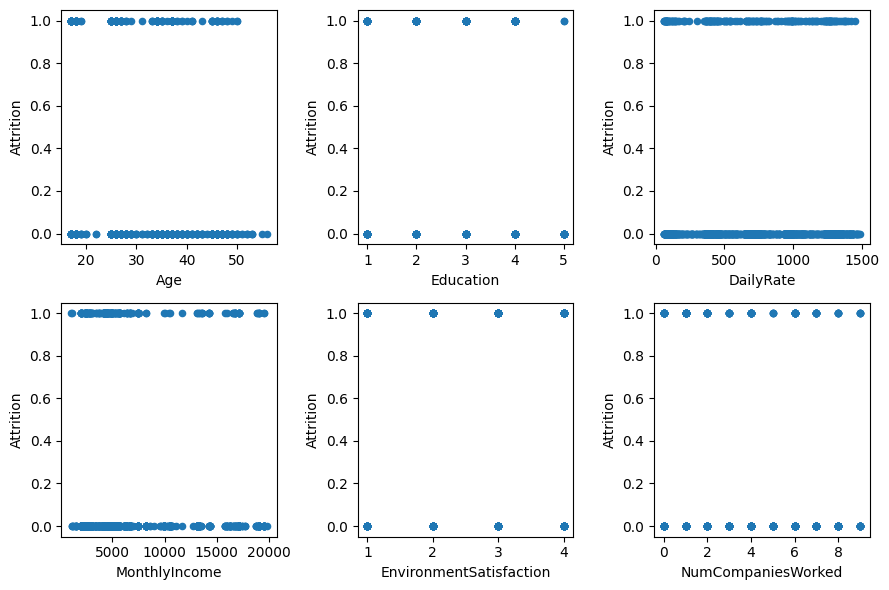

In [12]:
fig, ax = plt.subplots(2,3,figsize=(9,6)) # 2行3列のサブプロットを持つ図で9インチの幅と6インチの高さ
train.plot.scatter(x="Age", y="Attrition", ax=ax[0][0])
train.plot.scatter(x="Education", y="Attrition", ax=ax[0][1])
train.plot.scatter(x="DailyRate", y="Attrition", ax=ax[0][2]) # precipitation=降水量
train.plot.scatter(x="MonthlyIncome", y="Attrition", ax=ax[1][0]) # 月給
train.plot.scatter(x="EnvironmentSatisfaction", y="Attrition", ax=ax[1][1])
train.plot.scatter(x="NumCompaniesWorked", y="Attrition", ax=ax[1][2])
plt.tight_layout()

In [13]:
"""
# "MonthlyIncome"列の中央値を計算
median_monthly_income = train["MonthlyIncome"].median()

# "MonIncome"列を作成して中央値よりも小さいか大きいかを判定
train["MonIncome"] = train["MonthlyIncome"].apply(lambda x: median_monthly_income if x >= median_monthly_income else 0)

# "MonIncome"列と"Attrition"列の組み合わせごとの件数を集計
counts = train.groupby(["MonIncome", "Attrition"]).size().reset_index(name="count")

# 棒グラフを描画
sns.barplot(x="MonIncome", y="count", hue="Attrition", data=counts)
plt.xlabel("MonthlyIncome")
plt.ylabel("number")
plt.title("MonthlyIncome")
plt.show()
"""

'\n# "MonthlyIncome"列の中央値を計算\nmedian_monthly_income = train["MonthlyIncome"].median()\n\n# "MonIncome"列を作成して中央値よりも小さいか大きいかを判定\ntrain["MonIncome"] = train["MonthlyIncome"].apply(lambda x: median_monthly_income if x >= median_monthly_income else 0)\n\n# "MonIncome"列と"Attrition"列の組み合わせごとの件数を集計\ncounts = train.groupby(["MonIncome", "Attrition"]).size().reset_index(name="count")\n\n# 棒グラフを描画\nsns.barplot(x="MonIncome", y="count", hue="Attrition", data=counts)\nplt.xlabel("MonthlyIncome")\nplt.ylabel("number")\nplt.title("MonthlyIncome")\nplt.show()\n'

In [14]:
"""
corrmat = train.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, cmap="RdBu_r", annot=True, fmt=".2f", vmax=1, vmin=-1, square=True);
"""

'\ncorrmat = train.corr()\nf, ax = plt.subplots(figsize=(30, 20))\nsns.heatmap(corrmat, cmap="RdBu_r", annot=True, fmt=".2f", vmax=1, vmin=-1, square=True);\n'

20代後半〜50代前半の離職率高め

Monthly Incomeが7500以下の人は離職率高め

Linear法でモデリング

In [15]:
# 説明変数と目的変数を指定

# 説明変数のデータを作る
X = train.loc[:, ["Age", "MonthlyIncome", "YearsInCurrentRole"]].values

# 目的変数のデータを作る
y = train['Attrition'].values

In [16]:
X,y

(array([[   26, 16307,     8],
        [   47,  9526,     9],
        [   26, 10596,     2],
        ...,
        [   40,  3339,     9],
        [   37,  2011,     2],
        [   26,  4789,     2]]),
 array([0, 0, 0, ..., 0, 0, 1]))

In [17]:
# 重回帰のモデリング
# モデルのインスタンスを作る
reg2 = linear_model.LinearRegression()
# データをインプットする
reg2.fit(X,y)

LinearRegression()

In [18]:
"""2値化できないため無し

X1 = test.loc[:, ["Age", "MonthlyIncome", "YearsInCurrentRole"]].values

#sample.iloc[:, 1] = reg2.predict(X1)

# テストデータにおける説明変数
X1 = test.loc[:, ["Age", "MonthlyIncome", "YearsInCurrentRole"]].values

# モデルを使った予測値を出力
my_prediction = reg2.predict(X1)

# 予測値を2値化
predicted_classes = (my_prediction >= 0.5).astype(int)

# ID列を取得
id = np.array(test["id"]).astype(int)

# DataFrameを作成
#my_solution = pd.DataFrame({"ID": id, "Prediction": my_prediction}) #下のにheader文字を追加
my_solution = pd.DataFrame(my_prediction, id)

# 結果をCSVファイルに保存
my_solution.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/linear.csv", header=False)
print(my_solution)
"""

'2値化できないため無し\n\nX1 = test.loc[:, ["Age", "MonthlyIncome", "YearsInCurrentRole"]].values\n\n#sample.iloc[:, 1] = reg2.predict(X1)\n\n# テストデータにおける説明変数\nX1 = test.loc[:, ["Age", "MonthlyIncome", "YearsInCurrentRole"]].values\n\n# モデルを使った予測値を出力\nmy_prediction = reg2.predict(X1)\n\n# 予測値を2値化\npredicted_classes = (my_prediction >= 0.5).astype(int)\n\n# ID列を取得\nid = np.array(test["id"]).astype(int)\n\n# DataFrameを作成\n#my_solution = pd.DataFrame({"ID": id, "Prediction": my_prediction}) #下のにheader文字を追加\nmy_solution = pd.DataFrame(my_prediction, id)\n\n# 結果をCSVファイルに保存\nmy_solution.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/linear.csv", header=False)\nprint(my_solution)\n'

In [19]:
"""2値化のための良い閾値が得られなかったため無し

# モデルを使って予測値を得る
my_prediction = reg2.predict(X1)

# しきい値を設定
threshold = 0.5

# 予測値を2値化
predicted_classes = (my_prediction >= threshold).astype(int)

# ID列を取得
id = np.array(test["id"]).astype(int)

# DataFrameを作成
my_solution = pd.DataFrame({"ID": id, "Prediction": predicted_classes})

# 結果をCSVファイルに保存
my_solution.to_csv("linear_2.csv", index=False)
print(my_solution)

count_ones = my_solution["Prediction"].sum()

print("1の数:", count_ones)
"""

'2値化のための良い閾値が得られなかったため無し\n\n# モデルを使って予測値を得る\nmy_prediction = reg2.predict(X1)\n\n# しきい値を設定\nthreshold = 0.5\n\n# 予測値を2値化\npredicted_classes = (my_prediction >= threshold).astype(int)\n\n# ID列を取得\nid = np.array(test["id"]).astype(int)\n\n# DataFrameを作成\nmy_solution = pd.DataFrame({"ID": id, "Prediction": predicted_classes})\n\n# 結果をCSVファイルに保存\nmy_solution.to_csv("linear_2.csv", index=False)\nprint(my_solution)\n\ncount_ones = my_solution["Prediction"].sum()\n\nprint("1の数:", count_ones)\n'

In [20]:
"""
# モデルを使った予測値を出力
predictions = reg2.predict(X1)
print(predictions)
mean_value = np.mean(predictions)
print(mean_value)
"""

'\n# モデルを使った予測値を出力\npredictions = reg2.predict(X1)\nprint(predictions)\nmean_value = np.mean(predictions)\nprint(mean_value)\n'

In [21]:
"""
predictions = np.where(predictions >= 0.17383858321783294, 1, 0)
print(predictions)
count_ones = np.count_nonzero(predictions == 1)
print(count_ones)
"""

'\npredictions = np.where(predictions >= 0.17383858321783294, 1, 0)\nprint(predictions)\ncount_ones = np.count_nonzero(predictions == 1)\nprint(count_ones)\n'

k近傍法（k-Nearest Neighbors, k-NN）でモデリング

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# 「train」の目的変数と説明変数の値を取得
y = train['Attrition'].values
X = train.loc[:, ["Age", "MonthlyIncome", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"]].values

# k近傍法の作成
knn = KNeighborsClassifier(n_neighbors=30)  # k=5としている例
knn = knn.fit(X, y)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ["Age", "MonthlyIncome", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"]].values

# 「test」の説明変数を使ってk-NNモデルで予測
my_prediction = knn.predict(X1)

id = np.array(test["id"]).astype(int)
my_solution = pd.DataFrame(my_prediction, id)
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    my_solution.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_knn_k30_feature5_2.csv", header=None)
else:
    my_solution.to_csv("submit/my_knn_k30_feature5_2.csv", header=None)

In [23]:
print(my_solution)
# 1の数を数える
count_ones = (my_solution.iloc[:, 0] == 1).sum()

print("1の数:", count_ones)

      0
1     0
2     0
4     0
5     0
6     0
...  ..
1991  0
1992  0
1993  0
1995  0
1999  0

[800 rows x 1 columns]
1の数: 10


決定木でモデリング

In [24]:
# 「train」の目的変数と説明変数の値を取得
y = train['Attrition'].values
X = train.loc[:, ["Age", "MonthlyIncome", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"]].values

# 決定木の作成
my_tree_one = tree.DecisionTreeClassifier(max_depth=4)
my_tree_one = my_tree_one.fit(X, y)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ["Age", "MonthlyIncome", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"]].values

# 「test」の説明変数を使って「my_tree_one」のモデルで予測
my_prediction = my_tree_one.predict(X1)

id = np.array(test["id"]).astype(int)
my_solution = pd.DataFrame(my_prediction, id)
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    my_solution.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_tree_depth4_f5.csv", header=None)
else:
    my_solution.to_csv("submit/my_tree_depth4_f5.csv", header=None)

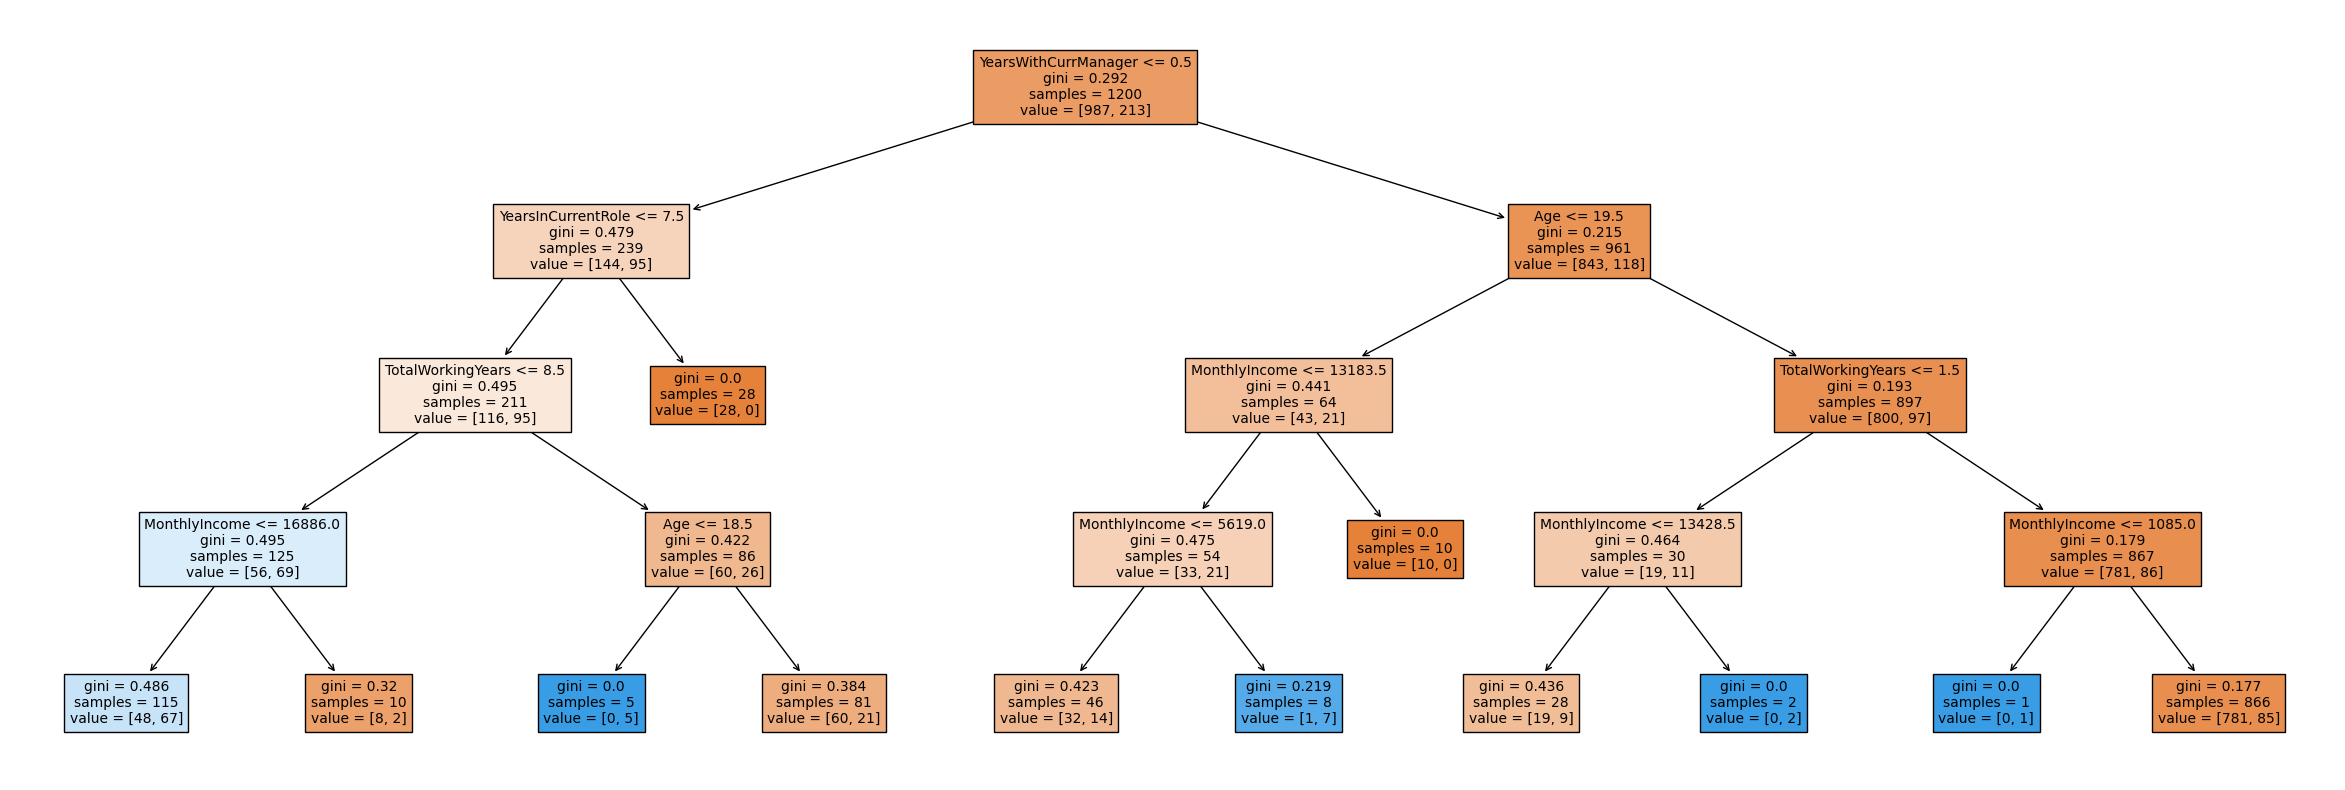

In [25]:
# 決定木をグラフィカルに表示
plt.figure(figsize=(30, 10))
tree.plot_tree(my_tree_one, fontsize=10, filled=True, feature_names=["Age", "MonthlyIncome", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"])
plt.show()

In [26]:
print(my_solution)
# 1の数を数える
count_ones = (my_solution.iloc[:, 0] == 1).sum()

print("1の数:", count_ones)

      0
1     0
2     1
4     0
5     0
6     0
...  ..
1991  0
1992  0
1993  0
1995  1
1999  1

[800 rows x 1 columns]
1の数: 92


SVMでモデリング

In [27]:
# 「train」の目的変数と説明変数の値を取得
y = train['Attrition'].values
X = train.loc[:, ["Age", "MonthlyIncome", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"]].values

# SVMの作成
svm_classifier = SVC(kernel='rbf', gamma=0.01)  # Linear kernel with C=1.0, you can experiment with different kernels and parameters
svm_classifier.fit(X, y)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ["Age", "MonthlyIncome", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"]].values

# 「test」の説明変数を使ってSVMモデルで予測
my_prediction = svm_classifier.predict(X1)

id = np.array(test["id"]).astype(int)
my_solution = pd.DataFrame(my_prediction, id)

# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    my_solution.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_svm_feature5_rbf.csv", header=None)
else:
    my_solution.to_csv("submit/my_svm_feature5_rbf.csv", header=None)

print(my_solution)
# 1の数を数える
count_ones = (my_solution.iloc[:, 0] == 1).sum()

print("1の数:", count_ones)

      0
1     0
2     0
4     0
5     0
6     0
...  ..
1991  0
1992  0
1993  0
1995  0
1999  0

[800 rows x 1 columns]
1の数: 21


ランダムフォレストでモデリング

In [28]:
from sklearn.ensemble import RandomForestClassifier

# 「train」の目的変数と説明変数の値を取得
y = train['Attrition'].values
X = train.loc[:, ["Age", "MonthlyIncome", "JobLevel", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"]].values

# 決定木の作成
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model=model.fit(X, y)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ["Age", "MonthlyIncome", "JobLevel", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"]].values

# 「test」の説明変数を使って「my_tree_one」のモデルで予測
predictions = model.predict(X1)

id = np.array(test["id"]).astype(int)
my_solution = pd.DataFrame(my_prediction, id)
#my_solution.to_csv('my_tree_2.csv', header=None)
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    my_solution.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/randomforest_nestimators_500_depth_5_f6.csv", header=None)
else:
    my_solution.to_csv("submit/randomforest_nestimators_500_depth_5_f6.csv", header=None)

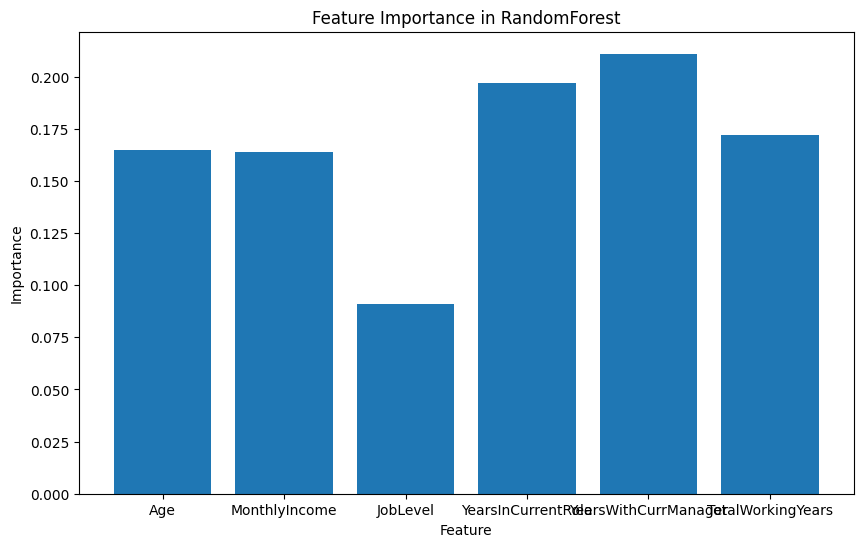

In [29]:
# 特徴量の重要度を取得
importances = model.feature_importances_

# 特徴量の名前
feature_names = ["Age", "MonthlyIncome", "JobLevel", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"]

# 特徴量の重要度を棒グラフで表示
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in RandomForest')
plt.show()

In [30]:
print(my_solution)
# 1の数を数える
count_ones = (my_solution.iloc[:, 0] == 1).sum()

print("1の数:", count_ones)

      0
1     0
2     0
4     0
5     0
6     0
...  ..
1991  0
1992  0
1993  0
1995  0
1999  0

[800 rows x 1 columns]
1の数: 21


ブースティングでモデリング

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# 「train」の目的変数と説明変数の値を取得
y = train['Attrition'].values
X = train.loc[:, ["Age", "MonthlyIncome", "JobLevel", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"]].values

# ブースティングの作成
boosting = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
boosting = boosting.fit(X, y)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ["Age", "MonthlyIncome", "JobLevel", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"]].values

# 「test」の説明変数を使ってブースティングモデルで予測
my_prediction = boosting.predict(X1)

id = np.array(test["id"]).astype(int)
my_solution = pd.DataFrame(my_prediction, id)
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    my_solution.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_boosting_f6.csv", header=None)
else:
    my_solution.to_csv("submit/my_boosting_f6.csv", header=None)

In [32]:
print(my_solution)
# 1の数を数える
count_ones = (my_solution.iloc[:, 0] == 1).sum()

print("1の数:", count_ones)

      0
1     0
2     0
4     0
5     0
6     0
...  ..
1991  0
1992  0
1993  0
1995  1
1999  0

[800 rows x 1 columns]
1の数: 94


In [33]:
"""
#import xgboost as xgb

# XGBoostのデータセットに変換
dtrain = xgb.DMatrix(X, label=y)

# パラメータの設定
params = {
    'max_depth': 3,  # 各決定木の深さ
    'eta': 0.1,      # 学習率
    'objective': 'binary:logistic',  # 2値分類問題
    'eval_metric': 'logloss'  # ロジスティック損失を使用してモデルの評価
}

# ブースティングの実行
num_rounds = 100  # ラウンド数（決定木の数）
bst = xgb.train(params, dtrain, num_rounds)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ["Age", "MonthlyIncome"]].values

# XGBoostのデータセットに変換
dtest = xgb.DMatrix(X1)

# 「test」の説明変数を使ってブースティングモデルで予測
my_prediction = bst.predict(dtest)

# 予測結果を2値化（閾値を0.5として0または1に変換）
my_prediction_binary = [1 if pred >= 0.5 else 0 for pred in my_prediction]

id = np.array(test["id"]).astype(int)
my_solution = pd.DataFrame(my_prediction_binary, id)
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    my_solution.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_xgboost.csv", header=None)
else:
    my_solution.to_csv("submit/my_xgboost.csv", header=None)
"""

'\n#import xgboost as xgb\n\n# XGBoostのデータセットに変換\ndtrain = xgb.DMatrix(X, label=y)\n\n# パラメータの設定\nparams = {\n    \'max_depth\': 3,  # 各決定木の深さ\n    \'eta\': 0.1,      # 学習率\n    \'objective\': \'binary:logistic\',  # 2値分類問題\n    \'eval_metric\': \'logloss\'  # ロジスティック損失を使用してモデルの評価\n}\n\n# ブースティングの実行\nnum_rounds = 100  # ラウンド数（決定木の数）\nbst = xgb.train(params, dtrain, num_rounds)\n\n# 「test」の説明変数の値を取得\nX1 = test.loc[:, ["Age", "MonthlyIncome"]].values\n\n# XGBoostのデータセットに変換\ndtest = xgb.DMatrix(X1)\n\n# 「test」の説明変数を使ってブースティングモデルで予測\nmy_prediction = bst.predict(dtest)\n\n# 予測結果を2値化（閾値を0.5として0または1に変換）\nmy_prediction_binary = [1 if pred >= 0.5 else 0 for pred in my_prediction]\n\nid = np.array(test["id"]).astype(int)\nmy_solution = pd.DataFrame(my_prediction_binary, id)\n# Google colab環境であるか判定\nif \'google.colab\' in sys.modules:\n    # マイドライブ内のデータに書き込むpathに設定\n    my_solution.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_xgboost.csv", hea

In [34]:
"""
import lightgbm as lgb

# LightGBMのデータセットに変換
dtrain = lgb.Dataset(X, label=y)

# パラメータの設定
params = {
    'max_depth': 3,      # 各決定木の深さ
    'learning_rate': 0.1, # 学習率
    'objective': 'binary',  # 2値分類問題
    'metric': 'binary_logloss'  # ロジスティック損失を使用してモデルの評価
}

# ブースティングの実行
num_rounds = 100  # ラウンド数（決定木の数）
bst = lgb.train(params, dtrain, num_rounds)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ["Age", "MonthlyIncome"]].values

# LightGBMのデータセットに変換
dtest = lgb.Dataset(X1)

# 「test」の説明変数を使ってブースティングモデルで予測
my_prediction = bst.predict(X1)

# 予測結果を2値化（閾値を0.5として0または1に変換）
my_prediction_binary = [1 if pred >= 0.5 else 0 for pred in my_prediction]

id = np.array(test["id"]).astype(int)
my_solution = pd.DataFrame(my_prediction_binary, id)
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    my_solution.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_lightgbm.csv", header=None)
else:
    my_solution.to_csv("submit/my_lightgbm.csv", header=None)
"""

'\nimport lightgbm as lgb\n\n# LightGBMのデータセットに変換\ndtrain = lgb.Dataset(X, label=y)\n\n# パラメータの設定\nparams = {\n    \'max_depth\': 3,      # 各決定木の深さ\n    \'learning_rate\': 0.1, # 学習率\n    \'objective\': \'binary\',  # 2値分類問題\n    \'metric\': \'binary_logloss\'  # ロジスティック損失を使用してモデルの評価\n}\n\n# ブースティングの実行\nnum_rounds = 100  # ラウンド数（決定木の数）\nbst = lgb.train(params, dtrain, num_rounds)\n\n# 「test」の説明変数の値を取得\nX1 = test.loc[:, ["Age", "MonthlyIncome"]].values\n\n# LightGBMのデータセットに変換\ndtest = lgb.Dataset(X1)\n\n# 「test」の説明変数を使ってブースティングモデルで予測\nmy_prediction = bst.predict(X1)\n\n# 予測結果を2値化（閾値を0.5として0または1に変換）\nmy_prediction_binary = [1 if pred >= 0.5 else 0 for pred in my_prediction]\n\nid = np.array(test["id"]).astype(int)\nmy_solution = pd.DataFrame(my_prediction_binary, id)\n# Google colab環境であるか判定\nif \'google.colab\' in sys.modules:\n    # マイドライブ内のデータに書き込むpathに設定\n    my_solution.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_lightgbm.csv", h

In [35]:
"""
print(my_solution)
# 1の数を数える
count_ones = (my_solution.iloc[:, 0] == 1).sum()

print("1の数:", count_ones)
"""

'\nprint(my_solution)\n# 1の数を数える\ncount_ones = (my_solution.iloc[:, 0] == 1).sum()\n\nprint("1の数:", count_ones)\n'

ロジスティック回帰でモデリング

In [36]:
"""
# 「train」の目的変数と説明変数の値を取得
y = train['Attrition'].values
X = train.loc[:, ["Age", "MonthlyIncome"]].values

# ロジスティック回帰モデルの学習（分類問題）
log_reg = LogisticRegression()
log_reg.fit(X, y)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ["Age", "MonthlyIncome"]].values

# 「test」の説明変数を使ってブースティングモデルで予測
my_prediction = boosting.predict(X1)

id = np.array(test["id"]).astype(int)
my_solution = pd.DataFrame(my_prediction, id)
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    my_solution.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_logistic.csv", header=None)
else:
    my_solution.to_csv("submit/my_logistic.csv", header=None)

print(my_solution)
# 1の数を数える
count_ones = (my_solution.iloc[:, 0] == 1).sum()

print("1の数:", count_ones)
"""

'\n# 「train」の目的変数と説明変数の値を取得\ny = train[\'Attrition\'].values\nX = train.loc[:, ["Age", "MonthlyIncome"]].values\n\n# ロジスティック回帰モデルの学習（分類問題）\nlog_reg = LogisticRegression()\nlog_reg.fit(X, y)\n\n# 「test」の説明変数の値を取得\nX1 = test.loc[:, ["Age", "MonthlyIncome"]].values\n\n# 「test」の説明変数を使ってブースティングモデルで予測\nmy_prediction = boosting.predict(X1)\n\nid = np.array(test["id"]).astype(int)\nmy_solution = pd.DataFrame(my_prediction, id)\n# Google colab環境であるか判定\nif \'google.colab\' in sys.modules:\n    # マイドライブ内のデータに書き込むpathに設定\n    my_solution.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_logistic.csv", header=None)\nelse:\n    my_solution.to_csv("submit/my_logistic.csv", header=None)\n\nprint(my_solution)\n# 1の数を数える\ncount_ones = (my_solution.iloc[:, 0] == 1).sum()\n\nprint("1の数:", count_ones)\n'

MLPでモデリング(+PCA:主成分分析)

feature_original: 800
X_scaled: 800
df_transformed: 800
[[ 0.44553935 -1.19794149]
 [-1.41416844  0.13016955]
 [ 1.0719499   0.93358478]
 ...
 [-0.55203108 -0.18796186]
 [-2.12769939  0.08316903]
 [-1.93007629  0.29918895]]
df_combined: 1200


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/Users/uenokoumare/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/uenokoumare/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210})

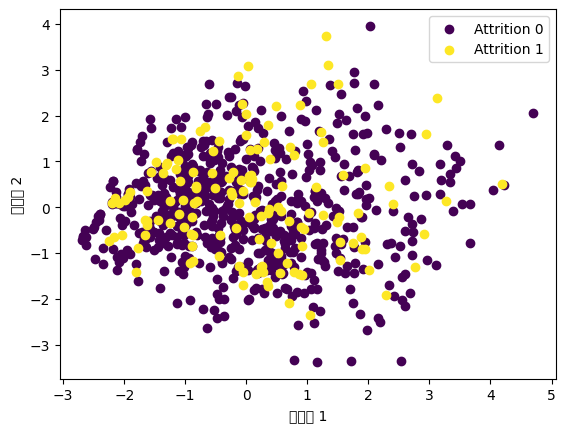

explained_variance_ratio [0.31924023 0.2107345 ]
components [[ 0.26516787  0.14573075  0.48320241  0.46537888  0.48563683  0.47174501]
 [ 0.46135938  0.48319965  0.28939    -0.45905094 -0.45896652  0.22032025]]


In [37]:
features = ["Age", "MonthlyIncome", "JobLevel", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"]
X = pd.get_dummies(train[features])
feature_original = pd.get_dummies(test[features])
print("feature_original:", len(feature_original))
y = train['Attrition'].values

X_scaled = (feature_original-feature_original.mean())/feature_original.std() #データの標準化
print("X_scaled:", len(X_scaled))

# PCAのインスタンスを作成
pca = PCA(n_components=2)  # n_componentsは主成分の数を指定（ここでは2つの主成分を抽出）

# データをPCAに適合させる
transformed_data = pca.fit_transform(X_scaled)

uniquey = pd.unique(y)
df_transformed = pd.DataFrame(data=transformed_data, columns=['主成分 1', '主成分 2'])
print("df_transformed:",len(df_transformed))
df_transformed_value = df_transformed.values
print(df_transformed_value)


# y も DataFrame に変換
df_y = pd.DataFrame(data=y, columns=['Attrition'])

# transformed_data と y を結合して DataFrame を作成
df_combined = pd.concat([df_transformed, df_y], axis=1)
print("df_combined:",len(df_combined))

# matplotlib の viridis カラーマップを利用して y のユニークな値ごとに色を生成
cmap = plt.cm.get_cmap('viridis', len(uniquey))

# 各クラス（Attritionが0または1）ごとに散布図を描画
for i, yi in enumerate(uniquey):
    data_subset = df_combined[df_combined['Attrition'] == yi]
    plt.scatter(data_subset['主成分 1'], data_subset['主成分 2'], c=cmap(i), label=f'Attrition {yi}')

plt.xlabel('主成分 1')
plt.ylabel('主成分 2')
plt.legend()
plt.show()

# 主成分の寄与率や固有ベクトルなどを取得する場合
print("explained_variance_ratio",pca.explained_variance_ratio_)
print("components", pca.components_)

In [38]:
def relu(v):
    x = np.maximum(0, v)
    return x

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def MSE(t, y):
    mse = np.mean(np.square(t - y))
    return mse


# データの分割
X_train, X_test, T_train, T_test = train_test_split(train, train['Attrition'], test_size=0.5, random_state=42)

# x_trainの特定のカラム名のデータだけ抽出
feature = ["Age", "MonthlyIncome", "JobLevel", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"]
x_train = X_train[feature].values

# x_testの特定のカラム名のデータだけ抽出
x_test = X_test[feature].values

# t_trainのデータだけ抽出
t_train = T_train.values

# t_testのデータだけ抽出
t_test = T_test.values

# 分割後のデータの確認
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

"""
# 最初の行を削除してデータ数を一致させる
x_test = x_test[1:]
t_test = t_test[1:]

# 修正後のデータの形状を再確認
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)
"""

(600, 6)
(600, 6)
(600,)
(600,)


'\n# 最初の行を削除してデータ数を一致させる\nx_test = x_test[1:]\nt_test = t_test[1:]\n\n# 修正後のデータの形状を再確認\nprint(x_train.shape)\nprint(x_test.shape)\nprint(t_train.shape)\nprint(t_test.shape)\n'

In [39]:
# 回帰モデル
class MLP_regressor():
    '''
    多層パーセプトロン Multi Layered Perceptron
    構成: [入力層, 第1層, 第2層, 第3層, 出力層]
    ノード数: [2, 50, 50, 10, 1]
    '''

    def __init__(self):
        '''
        コンストラクタ
        パラメータ（重みw, バイアスb）の定義
        第1層重み self.w1: [2, 50] 平均0, 標準偏差0.1の乱数
        第2層重み self.w2: [50, 50] 平均0, 標準偏差0.1の乱数
        第3層重み self.w3: [50, 10] 平均0, 標準偏差0.1の乱数
        第4層重み self.w4: [10, 1] 平均0, 標準偏差0.1の乱数

        第1層バイアス self.b1: [50] 要素が全て0
        第2層バイアス self.b2: [50] 要素が全て0
        第3層バイアス self.b3: [10] 要素が全て0
        第4層バイアス self.b4: [1] 要素が全て0
        '''

        # 重みの定義
        self.w1 = np.random.randn(6, 50) * 0.1
        self.w2 = np.random.randn(50, 50) * 0.1
        self.w3 = np.random.randn(50, 10) * 0.1
        self.w4 = np.random.randn(10, 1) * 0.1

        # バイアスの定義
        self.b1 = np.zeros(50, dtype=float)
        self.b2 = np.zeros(50, dtype=float)
        self.b3 = np.zeros(10, dtype=float)
        self.b4 = np.zeros(1, dtype=float)

    def forward(self, x):
        '''
        順伝播
        入力 x: [N, 2]
        入力層 self.layer0: [N, 2]
        第1層 self.layer1: [N, 50]
        第2層 self.layer2: [N, 50]
        第3層 self.layer3: [N, 10]
        出力層 self.out: [N, 1]
        '''

        self.layer0 = x
        self.layer1 = leaky_relu(np.dot(self.layer0, self.w1) + self.b1)
        self.layer2 = leaky_relu(np.dot(self.layer1, self.w2) + self.b2)
        self.layer3 = leaky_relu(np.dot(self.layer2, self.w3) + self.b3)
        self.out = np.dot(self.layer3, self.w4) + self.b4
        return self.out

    def backward(self, t, y):
        '''
        逆伝播
        真の値 t: [N, 1]
        予測値 y: [N, 1]

        出力層誤差 delta4: [N, 1]
        第3層誤差 delta3: [N, 10]
        第2層誤差 delta2: [N, 50]
        第1層誤差 delta1: [N, 50]

        第4層b勾配 dedb4: [N, 1]
        第3層b勾配 dedb3: [N, 10]
        第2層b勾配 dedb2: [N, 50]
        第1層b勾配 dedb1: [N, 50]

        第4層w勾配 dedw4: [N, 10, 1]
        第3層w勾配 dedw3: [N, 50, 10]
        第2層w勾配 dedw2: [N, 50, 50]
        第1層w勾配 dedw1: [N, 2, 50]
        '''

        # 出力層の誤差デルタは二乗誤差の微分
        #delta4 = -2 * (t - y)
        delta4 = -2 * (t_train.reshape(-1, 1) - y) # delta4の形状: (N, 1)
        # 誤差逆伝播
        delta3 = np.dot(delta4, self.w4.transpose()) # delta3の形状: (N, 10)   #transpose()関数は転置をする
        delta2 = np.dot(delta3 * np.where(self.layer3 > 0, 1., 0.), self.w3.transpose())      #np.whereは、指定した条件がTrueの場合は第二引数の値を、条件がFalseの場合は第三引数の値を選択
        delta1 = np.dot(delta2 * np.where(self.layer2 > 0, 1., 0.), self.w2.transpose())

        # バイアスbのコスト関数eに対する勾配
        self.dedb4 = np.mean(delta4, axis=0)
        self.dedb3 = np.mean(delta3 * (self.layer3 > 0), axis=0)    #誤差の平均を勾配としている
        self.dedb2 = np.mean(delta2 * (self.layer2 > 0), axis=0)
        self.dedb1 = np.mean(delta1 * (self.layer1 > 0), axis=0)

        # 重みwのコスト関数eに対する勾配
        self.dedw4 = np.dot(self.layer3.T, delta4) / delta4.shape[0]
        self.dedw3 = np.dot(self.layer2.T, delta3 * (self.layer3 > 0)) / delta3.shape[0] #delta1.shape[0]を使用して行列の要素数（サンプル数）で割ることで、平均値を計算することができる
        self.dedw2 = np.dot(self.layer1.T, delta2 * (self.layer2 > 0)) / delta2.shape[0]
        self.dedw1 = np.dot(self.layer0.T, delta1 * (self.layer1 > 0)) / delta1.shape[0]

    def optimize_GradientDecent(self, lr):
        '''
        勾配降下法によるパラメータの更新
        '''
        self.b1 -= lr * self.dedb1
        self.b2 -= lr * self.dedb2
        self.b3 -= lr * self.dedb3
        self.b4 -= lr * self.dedb4

        self.w1 -= lr * self.dedw1
        self.w2 -= lr * self.dedw2
        self.w3 -= lr * self.dedw3
        self.w4 -= lr * self.dedw4

In [40]:

# モデルの定義
model = MLP_regressor()

# 学習率
lr = 0.000001 #学習率0.01だと大きすぎてnanになる
# 学習エポック数
n_epoch = 500


# n_epoch繰り返す
for n in range(n_epoch):
    # 訓練
    # Chapter02範囲外のため、ミニバッチは使用しない
    y = model.forward(x_train)
    train_loss = MSE(t_train, y)
    model.backward(t_train, y)
    model.optimize_GradientDecent(lr)

    # テスト
    y = model.forward(x_test)
    test_loss = MSE(t_test, y)

    print('EPOCH ', n + 1, ' | TRAIN LOSS ',
          train_loss, ' | TEST LOSS ', test_loss)
regression_loss = test_loss


EPOCH  1  | TRAIN LOSS  3.357466072459145  | TEST LOSS  7.794056234005855
EPOCH  2  | TRAIN LOSS  6.897088761013923  | TEST LOSS  16.203759628580862
EPOCH  3  | TRAIN LOSS  14.486136905654929  | TEST LOSS  34.38559715332945
EPOCH  4  | TRAIN LOSS  30.506728018370577  | TEST LOSS  72.57348060030434
EPOCH  5  | TRAIN LOSS  64.70892387573357  | TEST LOSS  151.66369455619864
EPOCH  6  | TRAIN LOSS  134.749675240894  | TEST LOSS  313.7234035264442
EPOCH  7  | TRAIN LOSS  279.396472033204  | TEST LOSS  560.2365194047404
EPOCH  8  | TRAIN LOSS  499.35689206330323  | TEST LOSS  17.093205032051188
EPOCH  9  | TRAIN LOSS  15.233427495344516  | TEST LOSS  12.76295632872136
EPOCH  10  | TRAIN LOSS  11.326628856437308  | TEST LOSS  9.28350929068488
EPOCH  11  | TRAIN LOSS  8.281972277221875  | TEST LOSS  6.883391273888621
EPOCH  12  | TRAIN LOSS  6.105964779659579  | TEST LOSS  5.019986866336724
EPOCH  13  | TRAIN LOSS  4.480169013736544  | TEST LOSS  3.750192412067809
EPOCH  14  | TRAIN LOSS  3.32

In [41]:
"""
import matplotlib.pyplot as plt

# 学習率
lr = 0.000001
# 学習エポック数
n_epoch = 1000

# 損失を記録するリストを作成
train_losses = []
test_losses = []

# モデルの定義
model = MLP_regressor()

# n_epoch繰り返す
for n in range(n_epoch):
    # 訓練
    # Chapter02範囲外のため、ミニバッチは使用しない
    y = model.forward(x_train)
    train_loss = MSE(t_train, y)
    model.backward(t_train, y)
    model.optimize_GradientDecent(lr)
    train_losses.append(train_loss)

    # テスト
    y = model.forward(x_test)
    test_loss = MSE(t_test, y)
    test_losses.append(test_loss)

    print('EPOCH ', n + 1, ' | TRAIN LOSS ', train_loss, ' | TEST LOSS ', test_loss)

# 損失をグラフにプロット
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epoch + 1), train_losses, label='Train Loss')
plt.plot(range(1, n_epoch + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\n# 学習率\nlr = 0.000001\n# 学習エポック数\nn_epoch = 1000\n\n# 損失を記録するリストを作成\ntrain_losses = []\ntest_losses = []\n\n# モデルの定義\nmodel = MLP_regressor()\n\n# n_epoch繰り返す\nfor n in range(n_epoch):\n    # 訓練\n    # Chapter02範囲外のため、ミニバッチは使用しない\n    y = model.forward(x_train)\n    train_loss = MSE(t_train, y)\n    model.backward(t_train, y)\n    model.optimize_GradientDecent(lr)\n    train_losses.append(train_loss)\n\n    # テスト\n    y = model.forward(x_test)\n    test_loss = MSE(t_test, y)\n    test_losses.append(test_loss)\n\n    print('EPOCH ', n + 1, ' | TRAIN LOSS ', train_loss, ' | TEST LOSS ', test_loss)\n\n# 損失をグラフにプロット\nplt.figure(figsize=(10, 6))\nplt.plot(range(1, n_epoch + 1), train_losses, label='Train Loss')\nplt.plot(range(1, n_epoch + 1), test_losses, label='Test Loss')\nplt.xlabel('Epoch')\nplt.ylabel('Loss')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

In [47]:
y = train['Attrition']

features = ["Age", "MonthlyIncome", "JobLevel", "YearsInCurrentRole", "YearsWithCurrManager", "TotalWorkingYears"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])
print("X_test:", len(X_test))

# テストデータを予測
y_pred = model.forward(X_test)


# 予測結果を1次元に変換
y_pred = y_pred.flatten()
#print(y_pred)

# 中央値を求める
median_value = np.median(y_pred)
print("中央値:", median_value) #中央値: 0.07812249278745975

# 平均値を求める
mean_value = y_pred.mean()
print("平均値:", mean_value) #平均値: 0.11127444693573016

# 予測結果を0と1の二値に変換
y_pred_binary = [1 if pred >= 0.4 else 0 for pred in y_pred]
print("y_pred_binary:", len(y_pred_binary))
id = np.array(test["id"]).astype(int)
print("id;", len(id))
my_solution = pd.DataFrame(y_pred_binary, id)
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    my_solution.to_csv('/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_MLP_newf.csv')
else:
    my_solution.to_csv("submit/my_MLP_newf.csv", header=None)

print(my_solution)
# 1の数を数える
count_ones = (my_solution.iloc[:, 0] == 1).sum()

print("1の数:", count_ones)

X_test: 800
中央値: 0.047740207509440635
平均値: 0.08270232694280832
y_pred_binary: 800
id; 800
      0
1     0
2     0
4     0
5     0
6     0
...  ..
1991  0
1992  0
1993  0
1995  0
1999  0

[800 rows x 1 columns]
1の数: 16


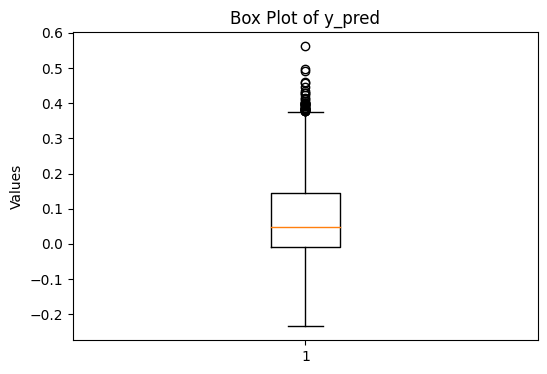

In [43]:
# データを箱ひげ図で表示
plt.figure(figsize=(6, 4))
plt.boxplot(y_pred)
plt.title('Box Plot of y_pred')
plt.ylabel('Values')
plt.show()

In [44]:
q4 = np.percentile(y_pred, 100) # 第4四分位数を計算
q3 = np.percentile(y_pred, 75) # 第3四分位数を計算
q1 = np.percentile(y_pred, 15) # 第1四分位数を計算
q = (q4 -q3)/2 + q3
print("q:", q)
print("第4四分位数:", q4)
print("第3四分位数:", q3)
print("第1四分位数:", q1)
max_value = np.max(y_pred)
min_value = np.min(y_pred)

print("最大値:", max_value)
print("最小値:", min_value)

q: 0.3535607955718345
第4四分位数: 0.5616580861244688
第3四分位数: 0.14546350501920027
第1四分位数: -0.041814114224011156
最大値: 0.5616580861244688
最小値: -0.23416007645052464


平均したアンサンブル

In [45]:
# 提出ファイルを作成
if 'google.colab' in sys.modules:
    # モデル1の予測結果を読み込む
    submission1 = pd.read_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_knn.csv", header=None)
    # モデル2の予測結果を読み込む
    submission2 = pd.read_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_tree_depth5.csv", header=None)
    # モデル3の予測結果を読み込む
    submission3 = pd.read_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_MLP.csv", header=None)
    # モデル4の予測結果を読み込む
    submission4 = pd.read_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_knn_feature5.csv", header=None)
    # モデル5の予測結果を読み込む
    submission5 = pd.read_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_knn_k30_feature6.csv.csv", header=None)
else:
    # モデル1の予測結果を読み込む
    submission1 = pd.read_csv("submit/my_knn.csv", header=None)
    # モデル2の予測結果を読み込む
    submission2 = pd.read_csv("submit/my_tree_depth5.csv", header=None)
    # モデル3の予測結果を読み込む
    submission3 = pd.read_csv("submit/my_MLP.csv", header=None)
    # モデル4の予測結果を読み込む
    submission4 = pd.read_csv("submit/my_knn_feature5.csv", header=None)
    # モデル5の予測結果を読み込む
    submission5 = pd.read_csv("submit/my_knn_k30_feature6.csv", header=None)

# 予測結果を平均する
final_submission = (submission1 + submission2 + submission3 + submission4 + submission5) / 5
# 2列目（1列目）だけを取り出す場合
second_column = final_submission.iloc[:, 1]
#print(second_column)

# 予測結果を2値化（閾値を0.5として0または1に変換）
final_submission_binary = np.where(second_column >= 0.5, 1, 0)

# 提出用のDataFrameを作成
id = np.array(test["id"]).astype(int)
final_solution = pd.DataFrame(final_submission_binary, id)
#print(final_solution)

# 提出ファイルを作成
if 'google.colab' in sys.modules:
    final_solution.to_csv('/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/final_submission_4.csv', header=None)
else:
    final_solution.to_csv("submit/final_submission_4.csv", header=None)

print(final_solution)
# 1の数を数える
count_ones = (final_solution.iloc[:, 0] == 1).sum()

print("1の数:", count_ones)

      0
1     0
2     0
4     0
5     0
6     0
...  ..
1991  0
1992  0
1993  0
1995  0
1999  0

[800 rows x 1 columns]
1の数: 8
